# INDEX

- **Manipulations based on content**
	- filtering
	- sorting
	- removing duplicates
	- Encoding
      - label encoding
      - onehot encoding
	- Binning
	- appending - pd.concat()
	- joins 
	- aggregations
    - Reshaping 
      - long to wide 
      - wide to long
	- imputing missing values - NaN
	- capping outliers

In [5]:
import pandas as pd
import os
os.chdir(r'D:\analytixlabs\DataSets')
os.getcwd()

'D:\\analytixlabs\\DataSets'

In [4]:
stores = pd.read_csv("stores.csv") 
stores.shape

(32, 15)

# Content Manipulations

## 1. Filtering (applying conditions)
- filtering is done on rows - selecting rows based on conditions
- for filtering `df.loc[,]`
    - conditions/boolean indexes are passed to the rows part
    - `df.loc[<condition>,]`

In [18]:
# task : from stores, get all data from chennai location
stores.loc[stores.Location == "Chennai",]

,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment
8,STR109,Electronics Zone,Electronincs,Chennai,22.8,40,140.8,95,3.92,3.150,22.90,1,0,4,2
9,STR110,Apparel Zone,Apparel,Chennai,19.2,60,167.6,123,3.92,3.440,18.30,1,0,4,4
10,STR111,Super Bazar,Super Market,Chennai,17.8,60,167.6,123,3.92,3.440,18.90,1,0,4,4
11,STR112,Super Market,Super Market,Chennai,16.4,80,275.8,180,NaN,4.070,17.40,0,0,3,3
12,STR113,Central Store,Super Market,Chennai,17.3,80,275.8,180,NaN,3.730,17.60,0,0,3,3
13,STR114,Apparel Zone,Apparel,Chennai,15.2,80,275.8,180,NaN,3.780,18.00,0,0,3,3
14,STR115,Fashion Bazar,Apparel,Chennai,10.4,80,472.0,205,2.93,5.250,17.98,0,0,3,4
15,STR116,Digital Bazar,Electronincs,Chennai,10.4,80,460.0,215,3.00,5.424,17.82,0,0,3,4


In [19]:
# task : from stores, get all data from chennai location

sub1 = stores.loc[stores.Location == "Chennai",].reset_index(drop=True)
# loc : 8,9,10,11..15 and iloc is 0 to n-1
# reset_index changes loc (8,9,10,11..15) to loc (0 to n-1)
sub1

,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment
0,STR109,Electronics Zone,Electronincs,Chennai,22.8,40,140.8,95,3.92,3.150,22.90,1,0,4,2
1,STR110,Apparel Zone,Apparel,Chennai,19.2,60,167.6,123,3.92,3.440,18.30,1,0,4,4
2,STR111,Super Bazar,Super Market,Chennai,17.8,60,167.6,123,3.92,3.440,18.90,1,0,4,4
3,STR112,Super Market,Super Market,Chennai,16.4,80,275.8,180,NaN,4.070,17.40,0,0,3,3
4,STR113,Central Store,Super Market,Chennai,17.3,80,275.8,180,NaN,3.730,17.60,0,0,3,3
5,STR114,Apparel Zone,Apparel,Chennai,15.2,80,275.8,180,NaN,3.780,18.00,0,0,3,3
6,STR115,Fashion Bazar,Apparel,Chennai,10.4,80,472.0,205,2.93,5.250,17.98,0,0,3,4
7,STR116,Digital Bazar,Electronincs,Chennai,10.4,80,460.0,215,3.00,5.424,17.82,0,0,3,4


In [20]:
stores.loc[stores.Location == "Mumbai",].reset_index()

,index,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment
0,16,STR117,Electronics Zone,Electronincs,Mumbai,14.7,80,440.0,230,3.23,5.345,17.42,0,0,3,4
1,17,STR118,Apparel Zone,Apparel,Mumbai,32.4,40,78.7,66,4.08,2.200,19.47,1,1,4,1
2,18,STR119,Super Bazar,Super Market,Mumbai,30.4,40,75.7,52,4.93,1.615,18.52,1,1,4,2
3,19,STR120,Super Market,Super Market,Mumbai,33.9,40,71.1,65,4.22,1.835,19.90,1,1,4,1
4,20,STR121,Central Store,Super Market,Mumbai,21.5,40,120.1,97,3.70,2.465,20.01,1,0,3,1
5,21,STR122,Apparel Zone,Apparel,Mumbai,15.5,80,318.0,150,2.76,3.520,16.87,0,0,3,2
6,22,STR123,Fashion Bazar,Apparel,Mumbai,15.2,80,304.0,150,3.15,3.435,17.30,0,0,3,2
7,23,STR124,Digital Bazar,Electronincs,Mumbai,13.3,80,350.0,245,3.73,3.840,15.41,0,0,3,4


In [21]:
stores.loc[stores.Location == "Mumbai"].reset_index(drop=True) # drop = true removes index column

,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment
0,STR117,Electronics Zone,Electronincs,Mumbai,14.7,80,440.0,230,3.23,5.345,17.42,0,0,3,4
1,STR118,Apparel Zone,Apparel,Mumbai,32.4,40,78.7,66,4.08,2.200,19.47,1,1,4,1
2,STR119,Super Bazar,Super Market,Mumbai,30.4,40,75.7,52,4.93,1.615,18.52,1,1,4,2
3,STR120,Super Market,Super Market,Mumbai,33.9,40,71.1,65,4.22,1.835,19.90,1,1,4,1
4,STR121,Central Store,Super Market,Mumbai,21.5,40,120.1,97,3.70,2.465,20.01,1,0,3,1
5,STR122,Apparel Zone,Apparel,Mumbai,15.5,80,318.0,150,2.76,3.520,16.87,0,0,3,2
6,STR123,Fashion Bazar,Apparel,Mumbai,15.2,80,304.0,150,3.15,3.435,17.30,0,0,3,2
7,STR124,Digital Bazar,Electronincs,Mumbai,13.3,80,350.0,245,3.73,3.840,15.41,0,0,3,4


In [22]:
# Task : from stores select rows where TotalSales is between 150 - 250

ts = stores.TotalSales
sub2 = stores.loc[(ts > 150) & (ts < 250),].reset_index(drop=True)
sub2

,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment
0,STR101,Electronics Zone,Electronincs,Delhi,21.0,60,160.0,110,3.90,2.620,16.46,0,1,4,4
1,STR102,Apparel Zone,Apparel,Delhi,21.0,60,160.0,110,3.90,2.875,17.02,0,1,4,4
2,STR106,Apparel Zone,Apparel,Delhi,18.1,60,225.0,105,2.76,3.460,20.22,1,0,3,1
3,STR110,Apparel Zone,Apparel,Chennai,19.2,60,167.6,123,3.92,3.440,18.30,1,0,4,4
4,STR111,Super Bazar,Super Market,Chennai,17.8,60,167.6,123,3.92,3.440,18.90,1,0,4,4


In [25]:
# Task : from stores select rows where TotalSales is between 150 - 250
# and get "StoreCode", "Location", "TotalSales" and "OperatingCost"
stores.loc[(stores.TotalSales > 150) & (stores.TotalSales < 250),["StoreCode", "Location", "TotalSales", "OperatingCost"]]

,StoreCode,Location,TotalSales,OperatingCost
0,STR101,Delhi,160.0,21.0
1,STR102,Delhi,160.0,21.0
5,STR106,Delhi,225.0,18.1
9,STR110,Chennai,167.6,19.2
10,STR111,Chennai,167.6,17.8


In [26]:
# Task : from stores select rows where TotalSales is between 150 - 250
# and get "StoreCode", "Location", "TotalSales" and "OperatingCost"

sub3 = stores.loc[(ts > 150) & (ts < 250),["StoreCode", "Location", "TotalSales", "OperatingCost"]]
sub3.reset_index(drop=True)

,StoreCode,Location,TotalSales,OperatingCost
0,STR101,Delhi,160.0,21.0
1,STR102,Delhi,160.0,21.0
2,STR106,Delhi,225.0,18.1
3,STR110,Chennai,167.6,19.2
4,STR111,Chennai,167.6,17.8


## 2. Sorting
- sorting is done using the attribute `DF.sort_values(by = [], ascending=True/False)`
- in `by=[]` we can pass a column or group of columns

In [ ]:
# 2.1 Sort by one column in asc order - Location
sort1 = stores.sort_values(by = ["Location"]).reset_index(drop=True)

# 2.2 Sort by one column in desc order - OperatingCost
sort2 = stores.sort_values(by=["OperatingCost"], ascending=False).reset_index(drop=True)

# 2.3 Sort by two columns, both in asc order - Location and TotalSales
sort3 = stores.sort_values(by = ["Location","TotalSales"]).reset_index(drop=True)

# 2.4 Sort by two columns, both in desc order - Location and TotalSales
sort4 = stores.sort_values(by = ["Location","TotalSales"], ascending=False).reset_index(drop=True)

# 2.5 Sort by two columns, one in asc and one in desc - Location and TotalSales
sort5 = stores.sort_values(by = ["Location","TotalSales"], ascending=[True,False]).reset_index(drop=True)


In [28]:
stores

,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment
0,STR101,Electronics Zone,Electronincs,Delhi,21.0,60,160.0,110,3.90,2.620,16.46,0,1,4,4
1,STR102,Apparel Zone,Apparel,Delhi,21.0,60,160.0,110,3.90,2.875,17.02,0,1,4,4
2,STR103,Super Bazar,Super Market,Delhi,22.8,40,108.0,93,3.85,2.320,18.61,1,1,4,1
3,STR104,Super Market,Super Market,Delhi,21.4,60,258.0,110,3.08,3.215,19.44,1,0,3,1
4,STR105,Central Store,Super Market,Delhi,18.7,80,360.0,175,3.15,3.440,17.02,0,0,3,2
5,STR106,Apparel Zone,Apparel,Delhi,18.1,60,225.0,105,2.76,3.460,20.22,1,0,3,1
6,STR107,Fashion Bazar,Apparel,Delhi,14.3,80,360.0,245,3.21,3.570,15.84,0,0,3,4
7,STR108,Digital Bazar,Electronincs,Delhi,24.4,40,146.7,62,3.69,3.190,20.00,1,0,4,2
8,STR109,Electronics Zone,Electronincs,Chennai,22.8,40,140.8,95,3.92,3.150,22.90,1,0,4,2
9,STR110,Apparel Zone,Apparel,Chennai,19.2,60,167.6,123,3.92,3.440,18.30,1,0,4,4


In [27]:
stores.sort_values(by= ["StoreName", "Location", "Total_Customers", "OperatingCost"], ascending = [False,True,True,False]).reset_index(drop=True)
# dont sort more than 2 columns will give incorrect sorting

,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment
0,STR112,Super Market,Super Market,Chennai,16.4,80,275.8,180,NaN,4.070,17.40,0,0,3,3
1,STR104,Super Market,Super Market,Delhi,21.4,60,258.0,110,3.08,3.215,19.44,1,0,3,1
2,STR128,Super Market,Super Market,Kolkata,30.4,40,95.1,113,3.77,1.513,16.90,1,1,5,2
3,STR120,Super Market,Super Market,Mumbai,33.9,40,71.1,65,4.22,1.835,19.90,1,1,4,1
4,STR111,Super Bazar,Super Market,Chennai,17.8,60,167.6,123,3.92,3.440,18.90,1,0,4,4
5,STR103,Super Bazar,Super Market,Delhi,22.8,40,108.0,93,3.85,2.320,18.61,1,1,4,1
6,STR127,Super Bazar,Super Market,Kolkata,26.0,40,120.3,91,4.43,2.140,16.70,0,1,5,2
7,STR119,Super Bazar,Super Market,Mumbai,30.4,40,75.7,52,4.93,1.615,18.52,1,1,4,2
8,STR115,Fashion Bazar,Apparel,Chennai,10.4,80,472.0,205,2.93,5.250,17.98,0,0,3,4
9,STR107,Fashion Bazar,Apparel,Delhi,14.3,80,360.0,245,3.21,3.570,15.84,0,0,3,4


## 3. Removing Duplicates

- python checks for duplicates wrt a row
- user checks for duplicates wrt a column

In [6]:
import pandas as pd
scores = pd.read_csv("Score.csv")
scores

# 1. check if an entire row gets repeated anywhere or not - if so, mark it as duplicate
#   scores --> 0 - 7 : unique  (7 is unique because of Test2, and it searches for entire row)
#              8 - 13: repeats

# 2. let's consider a column - Student. Wrt student, how many rows are repeating
#   scores --> 0 - 6 : unique
#              7 - 13: repeats

,Student,Section,Test1,Test2,Final
0,Capalleti,1,94,91,87
1,Dubose,2,51,65,91
2,Engles,1,95,97,97
3,Grant,2,63,75,80
4,Krupski,2,80,76,71
5,Lundsford,1,92,40,86
6,Mcbane,1,75,78,72
7,Capalleti,1,94,65,87
8,Dubose,2,51,65,91
9,Engles,1,95,97,97


In [7]:
# for detecting duplicates - Ser.duplicated()
#  - returns a boolean index after checking for each element
#           4,3,1,2,4,2,3,6,1,3,6
#           F,F,F,F,T,T,T,F,T,T,T

ser1 = pd.Series([4,3,1,2,4,2,3,6,1,3,6])
ser1.duplicated() #  - returns a boolean index after checking for each element

# 1. get all the duplicated values from ser1
ser1.loc[ser1.duplicated()]
# 2. get all the unique (not duplicated) values from ser1
ser1.loc[~ser1.duplicated()]


0    4
1    3
2    1
3    2
7    6
dtype: int64

In [8]:
ser1 = pd.Series([4,3,1,2,4,2,3,6,1,3,6])
ser1.duplicated()

0     False
1     False
2     False
3     False
4      True
5      True
6      True
7     False
8      True
9      True
10     True
dtype: bool

In [9]:
ser1.loc[ser1.duplicated()]

4     4
5     2
6     3
8     1
9     3
10    6
dtype: int64

In [10]:
# 1. detect dups wrt an entire row
#                          - df.duplicated()
# 2. detect dups wrt a column
#                          - df.col.duplicated()

# A. duplicates from scores wrt an entire row
# 1. get all the duplicated values from scores

dups = scores.loc[scores.duplicated(),]
display(dups)  
# 2. get all the unique (not duplicated) values from scores
unique = scores.loc[~scores.duplicated(),]
display(unique)  #(7 is unique because of Test2, and it searches for entire row)

,Student,Section,Test1,Test2,Final
8,Dubose,2,51,65,91
9,Engles,1,95,97,97
10,Grant,2,63,75,80
11,Krupski,2,80,76,71
12,Lundsford,1,92,40,86
13,Mcbane,1,75,78,72


,Student,Section,Test1,Test2,Final
0,Capalleti,1,94,91,87
1,Dubose,2,51,65,91
2,Engles,1,95,97,97
3,Grant,2,63,75,80
4,Krupski,2,80,76,71
5,Lundsford,1,92,40,86
6,Mcbane,1,75,78,72
7,Capalleti,1,94,65,87


In [11]:
# B. duplicates from scores wrt a certain column - Student

# scores.Student.duplicated()

# 1. get all the duplicated values from scores wrt Student

dups = scores.loc[scores.Student.duplicated(),]
display(dups)
# 2. get all the unique (not duplicated) values from scores wrt Student
unique = scores.loc[~scores.Student.duplicated(),]
display(unique)


dups = scores.loc[scores.Student.duplicated(),] 
# right side is just for selecting columns not applying conditions or filtering,
# should be done on left side of comma

,Student,Section,Test1,Test2,Final
7,Capalleti,1,94,65,87
8,Dubose,2,51,65,91
9,Engles,1,95,97,97
10,Grant,2,63,75,80
11,Krupski,2,80,76,71
12,Lundsford,1,92,40,86
13,Mcbane,1,75,78,72


,Student,Section,Test1,Test2,Final
0,Capalleti,1,94,91,87
1,Dubose,2,51,65,91
2,Engles,1,95,97,97
3,Grant,2,63,75,80
4,Krupski,2,80,76,71
5,Lundsford,1,92,40,86
6,Mcbane,1,75,78,72


In [14]:
# ser.duplicated() - returns a boolean index after checking for each element

Series.duplicated(keep = "First")

#   keep = "first" or "last" or False
#  for a row : e.g. : row no 2 -- 6, 12, 20, 24, 40
#         - "first"   ->  2 is non duplicate and 6, 12, 20, 24, 40 are dups
#         - "last"    -> 40 is non duplicate and 2, 6, 12, 20, 24 are dups
#         - False     -> 2, 6, 12, 20, 24, 40  --> all will be considered duplicates


# Used for chronological data where you want to display current record for repeated rows

## 4. Encoding

### Application-
Models are built out of data. And data includes all kind of variables. 
Now problem here is if I include store type column(dtype:object) from stores dataset,
all these statistical and machine learning functions will not work. It will throw me an error.  
They'll throw an error because of the data type,those Applied Statistics, machine learning functions will not accept strings. 
It will not accept if the data type of the column is object. 

### 4.1 Label Encoding
- Process of substituting a text with a number
- E.g. : Location -   
                    Delhi, Mumbai, Kol, Chennai
				       2      3     4      1
- Each and every category of a categorical variable is given a code and the entire column is encoded
			


In [33]:
# encode the StoreType column
stores.StoreType.value_counts()

Apparel         12
Super Market    12
Electronincs     8
Name: StoreType, dtype: int64

In [36]:
import numpy as np
stores["StoreType_encoded"] = np.where((stores.StoreType == "Electronincs"),1,
         np.where((stores.StoreType == "Apparel"),2,3))

In [37]:
stores.StoreType_encoded

0     1
1     2
2     3
3     3
4     3
5     2
6     2
7     1
8     1
9     2
10    3
11    3
12    3
13    2
14    2
15    1
16    1
17    2
18    3
19    3
20    3
21    2
22    2
23    1
24    1
25    2
26    3
27    3
28    3
29    2
30    2
31    1
Name: StoreType_encoded, dtype: int32

### 4.2 Onehot Encoding

#### Application

Whenever you build a model using machine learning. And the model is built it will definitely
make sense if you're keeping direct numbers for these(ordinal variables).
It will not make sense for the nominal variables.We should use one hot encoding for nominal variables.

- Categorical Variables : divides the data
   - manually mark all the categorical variables	


	Nominal var	       Ordinal var
	------------	--------------------
	gender(M,F)	    Grade (A,A+,B,B+,C,F)
	Location	    AgeGroups
	StoreType	    EduQual	(UG<G<PG<Doc)
	Prod_Tpye	    Type_ticket (Eco<Pre_Eco<Business)
	Subjects	    Designation
	Txt_Type	    DressSize(S<M<L<XL)
	Dept
	BrandType
	Branch
	Veg-NonVeg
    
- create n cols corresponding to n categories
- in each column, put 1(True) if the category matches the column else put 0(False)
    - do it for all the cols 
- can be applied to both nominal and ordinal


In [39]:
# pandas.get_dummies()
pd.get_dummies(stores.StoreType)

,Apparel,Electronincs,Super Market
0,0,1,0
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,1,0,0
6,1,0,0
7,0,1,0
8,0,1,0
9,1,0,0


In [40]:
stores.head()

,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment,StoreType_encoded
0,STR101,Electronics Zone,Electronincs,Delhi,21.0,60,160.0,110,3.90,2.620,16.46,0,1,4,4,1
1,STR102,Apparel Zone,Apparel,Delhi,21.0,60,160.0,110,3.90,2.875,17.02,0,1,4,4,2
2,STR103,Super Bazar,Super Market,Delhi,22.8,40,108.0,93,3.85,2.320,18.61,1,1,4,1,3
3,STR104,Super Market,Super Market,Delhi,21.4,60,258.0,110,3.08,3.215,19.44,1,0,3,1,3
4,STR105,Central Store,Super Market,Delhi,18.7,80,360.0,175,3.15,3.440,17.02,0,0,3,2,3


In [42]:
stores.StoreName.value_counts()

Apparel Zone        8
Digital Bazar       4
Central Store       4
Electronics Zone    4
Super Market        4
Fashion Bazar       4
Super Bazar         4
Name: StoreName, dtype: int64

In [41]:
pd.get_dummies(stores.StoreName)

,Apparel Zone,Central Store,Digital Bazar,Electronics Zone,Fashion Bazar,Super Bazar,Super Market
0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0
5,1,0,0,0,0,0,0
6,0,0,0,0,1,0,0
7,0,0,1,0,0,0,0
8,0,0,0,1,0,0,0
9,1,0,0,0,0,0,0


## 5. Binning
- process by which we convert a continous variable into a categorical variable
- we create bins/buckets/ranges/categories

- E.g. Age (numbers)  --->   Age Category
           < 18		            child
          18 - 35               youth
          35 - 50             middle-age
          > 50		            senior
- E.g. : Histogram

In [44]:
ts = stores.TotalSales
stores["StorePerformance"] = np.where((ts<120),"Low",np.where((ts>250),"High","Medium"))
stores

,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment,StoreType_encoded,StorePerformance
0,STR101,Electronics Zone,Electronincs,Delhi,21.0,60,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Medium
1,STR102,Apparel Zone,Apparel,Delhi,21.0,60,160.0,110,3.90,2.875,17.02,0,1,4,4,2,Medium
2,STR103,Super Bazar,Super Market,Delhi,22.8,40,108.0,93,3.85,2.320,18.61,1,1,4,1,3,Low
3,STR104,Super Market,Super Market,Delhi,21.4,60,258.0,110,3.08,3.215,19.44,1,0,3,1,3,High
4,STR105,Central Store,Super Market,Delhi,18.7,80,360.0,175,3.15,3.440,17.02,0,0,3,2,3,High
5,STR106,Apparel Zone,Apparel,Delhi,18.1,60,225.0,105,2.76,3.460,20.22,1,0,3,1,2,Medium
6,STR107,Fashion Bazar,Apparel,Delhi,14.3,80,360.0,245,3.21,3.570,15.84,0,0,3,4,2,High
7,STR108,Digital Bazar,Electronincs,Delhi,24.4,40,146.7,62,3.69,3.190,20.00,1,0,4,2,1,Medium
8,STR109,Electronics Zone,Electronincs,Chennai,22.8,40,140.8,95,3.92,3.150,22.90,1,0,4,2,1,Medium
9,STR110,Apparel Zone,Apparel,Chennai,19.2,60,167.6,123,3.92,3.440,18.30,1,0,4,4,2,Medium


In [25]:
# Create a column named StorePerformance as low, med, high based on TotalSales
# low  :   < 120
# med  :  120 - 250
# high :  > 250

ts = stores.TotalSales
stores["StorePerformance"] = np.where((ts < 120), "Low", 
                                      np.where((ts >= 120) & (ts < 250),"med",
                                               "high"))
stores

,StoreCode,StoreName,StoreType,Location,OperatingCost,Staff_Cnt,TotalSales,Total_Customers,AcqCostPercust,BasketSize,ProfitPercust,OwnStore,OnlinePresence,Tenure,StoreSegment,StoreType_encoded,StorePerformance
0,STR101,Electronics Zone,Electronincs,Delhi,21.0,60,160.0,110,3.90,2.620,16.46,0,1,4,4,1,med
1,STR102,Apparel Zone,Apparel,Delhi,21.0,60,160.0,110,3.90,2.875,17.02,0,1,4,4,2,med
2,STR103,Super Bazar,Super Market,Delhi,22.8,40,108.0,93,3.85,2.320,18.61,1,1,4,1,3,Low
3,STR104,Super Market,Super Market,Delhi,21.4,60,258.0,110,3.08,3.215,19.44,1,0,3,1,3,high
4,STR105,Central Store,Super Market,Delhi,18.7,80,360.0,175,3.15,3.440,17.02,0,0,3,2,3,high
5,STR106,Apparel Zone,Apparel,Delhi,18.1,60,225.0,105,2.76,3.460,20.22,1,0,3,1,2,med
6,STR107,Fashion Bazar,Apparel,Delhi,14.3,80,360.0,245,3.21,3.570,15.84,0,0,3,4,2,high
7,STR108,Digital Bazar,Electronincs,Delhi,24.4,40,146.7,62,3.69,3.190,20.00,1,0,4,2,1,med
8,STR109,Electronics Zone,Electronincs,Chennai,22.8,40,140.8,95,3.92,3.150,22.90,1,0,4,2,1,med
9,STR110,Apparel Zone,Apparel,Chennai,19.2,60,167.6,123,3.92,3.440,18.30,1,0,4,4,2,med


## 6. Appending

- pasting or binding or **concat** two tables 
- can happen
    - by cols - column binding
        - no of rows should be same
    - by rows - row binding
        - no of cols should be same
        - col names should be same
        - col order should be same
- concat 
    - two or more series
    - two or more df
    - series and df

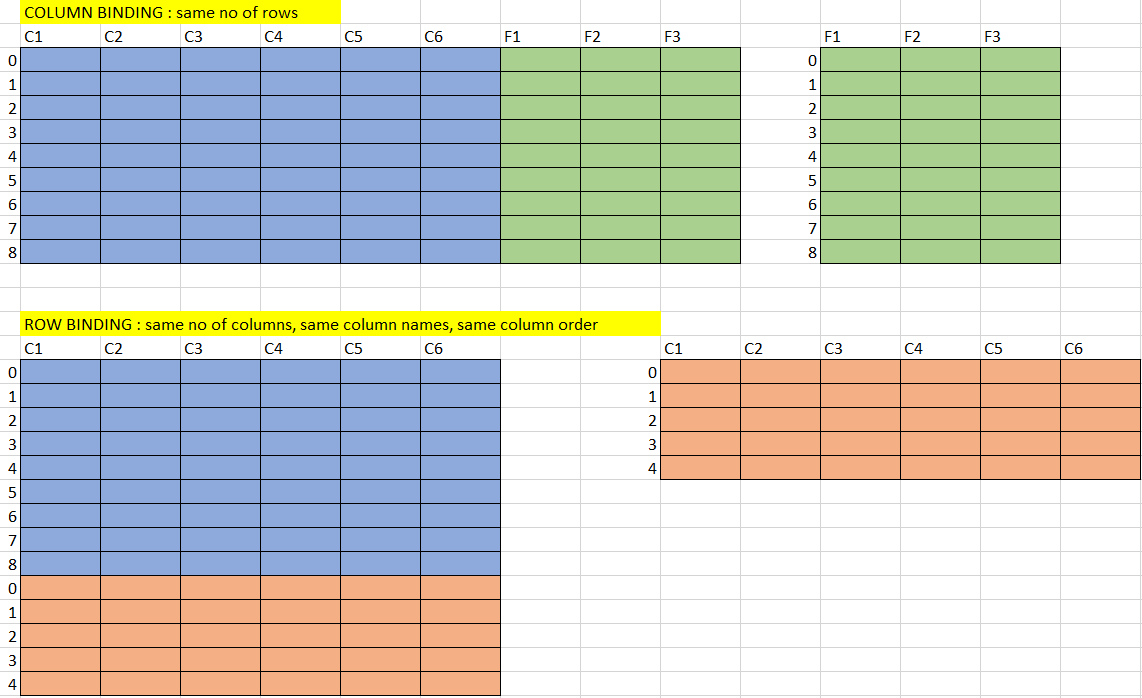

Getting an image into Jupyter NB is a much simpler operation 
- 1) Simply create an empty Markdown cell. 
- 2) Then drag-and-drop the image file into the empty Markdown cell.
 The Markdown code that will insert the image then appears.

In [ ]:
# pd.concat([], axis = 0) # row bind
# pd.concat([], axis = 1) # col bind

## 7. Joins

- outer, inner, left and right
    - outer - all cols, all rows
    - inner - all cols, but common rows
    - left - all cols from 2 tables and all rows from left
    - right - all cols from 2 tables and all rows from right    
    
- Syntax
- `pd.merge(left = , right = , on = [] , how = )`

    - `left=` the left table
    - `right=` the right table
    - `on=[]`
        - one or more common columns -- if the common column name is same in both the tables
    - `left_on=[]` and `right_on=[]`
        - common colum name as it is present in the left table
        - common colum name as it is present in the right table    
    - `how="inner"`
        - "outer", "left" or "right"

In [26]:
demographic = pd.read_csv("Demographic_Data.csv")
demographic

,CustName,Gender,Age,Location,Salary,Education,Mobile
0,Alex,M,21,UK,19159,PhD,8834777722
1,Tom,M,34,USA,10461,X,8812237772
2,Michel,M,25,India,19961,XII,8834777232
3,Michael,M,28,Belgium,821,B.Com,8831234222
4,Patrik,M,29,Australia,13743,MBA,8823427722
5,Hans,M,34,Japan,25000,MS,8834772342
6,Biliana,F,26,Russia,3000,MS,8837427722
7,Raj,M,29,India,2000,MS,9892877722
8,Laila,F,26,India,4000,MBA,7867277722
9,Prabhas,F,35,India,20000,MBA,8834772321


In [27]:
txn = pd.read_csv("Transaction_Summary.csv")
txn

,CustomerName,Total_Transaction_value,No_of_holding_prods,No_of_visits,No_of_channels
0,Alex,19159,3,3,1
1,Tom,10461,2,7,2
2,Michel,19961,4,8,3
3,Hans,821,1,2,2
4,Biliana,13743,6,9,3
5,Rajesh,25000,2,12,2
6,Laila,3000,1,6,1
7,Prabhas,2000,2,4,2
8,Ramu,30000,6,2,3


In [28]:
# inner join - Output gives all cols, but common rows

pd.merge(left=demographic, 
         right=txn, 
         left_on="CustName",
         right_on="CustomerName", 
         how = "inner" # default is inner
        )

# concat wouldn't work because demographic has 10 rows and transaction has 9 rows

,CustName,Gender,Age,Location,Salary,Education,Mobile,CustomerName,Total_Transaction_value,No_of_holding_prods,No_of_visits,No_of_channels
0,Alex,M,21,UK,19159,PhD,8834777722,Alex,19159,3,3,1
1,Tom,M,34,USA,10461,X,8812237772,Tom,10461,2,7,2
2,Michel,M,25,India,19961,XII,8834777232,Michel,19961,4,8,3
3,Hans,M,34,Japan,25000,MS,8834772342,Hans,821,1,2,2
4,Biliana,F,26,Russia,3000,MS,8837427722,Biliana,13743,6,9,3
5,Laila,F,26,India,4000,MBA,7867277722,Laila,3000,1,6,1
6,Prabhas,F,35,India,20000,MBA,8834772321,Prabhas,2000,2,4,2


In [31]:
## outer join - output gives all cols, all rows (NaN are missing values)

pd.merge(left=demographic, 
         right=txn, 
         left_on="CustName",
         right_on="CustomerName", 
         how = "outer", 
         indicator = True  #adds a column="_merge" & gives information both:common, left_only=left table, right_only=right table
        )

,CustName,Gender,Age,Location,Salary,Education,Mobile,CustomerName,Total_Transaction_value,No_of_holding_prods,No_of_visits,No_of_channels,_merge
0,Alex,M,21.0,UK,19159.0,PhD,8.834778e+09,Alex,19159.0,3.0,3.0,1.0,both
1,Tom,M,34.0,USA,10461.0,X,8.812238e+09,Tom,10461.0,2.0,7.0,2.0,both
2,Michel,M,25.0,India,19961.0,XII,8.834777e+09,Michel,19961.0,4.0,8.0,3.0,both
3,Michael,M,28.0,Belgium,821.0,B.Com,8.831234e+09,NaN,NaN,NaN,NaN,NaN,left_only
4,Patrik,M,29.0,Australia,13743.0,MBA,8.823428e+09,NaN,NaN,NaN,NaN,NaN,left_only
5,Hans,M,34.0,Japan,25000.0,MS,8.834772e+09,Hans,821.0,1.0,2.0,2.0,both
6,Biliana,F,26.0,Russia,3000.0,MS,8.837428e+09,Biliana,13743.0,6.0,9.0,3.0,both
7,Raj,M,29.0,India,2000.0,MS,9.892878e+09,NaN,NaN,NaN,NaN,NaN,left_only
8,Laila,F,26.0,India,4000.0,MBA,7.867278e+09,Laila,3000.0,1.0,6.0,1.0,both
9,Prabhas,F,35.0,India,20000.0,MBA,8.834772e+09,Prabhas,2000.0,2.0,4.0,2.0,both


In [33]:
## left join - Output gives all cols from 2 tables and all rows from left

pd.merge(left=demographic, 
         right=txn, 
         left_on="CustName",
         right_on="CustomerName", 
         how = "left", # default is inner
         indicator = True
        )

,CustName,Gender,Age,Location,Salary,Education,Mobile,CustomerName,Total_Transaction_value,No_of_holding_prods,No_of_visits,No_of_channels,_merge
0,Alex,M,21,UK,19159,PhD,8834777722,Alex,19159.0,3.0,3.0,1.0,both
1,Tom,M,34,USA,10461,X,8812237772,Tom,10461.0,2.0,7.0,2.0,both
2,Michel,M,25,India,19961,XII,8834777232,Michel,19961.0,4.0,8.0,3.0,both
3,Michael,M,28,Belgium,821,B.Com,8831234222,NaN,NaN,NaN,NaN,NaN,left_only
4,Patrik,M,29,Australia,13743,MBA,8823427722,NaN,NaN,NaN,NaN,NaN,left_only
5,Hans,M,34,Japan,25000,MS,8834772342,Hans,821.0,1.0,2.0,2.0,both
6,Biliana,F,26,Russia,3000,MS,8837427722,Biliana,13743.0,6.0,9.0,3.0,both
7,Raj,M,29,India,2000,MS,9892877722,NaN,NaN,NaN,NaN,NaN,left_only
8,Laila,F,26,India,4000,MBA,7867277722,Laila,3000.0,1.0,6.0,1.0,both
9,Prabhas,F,35,India,20000,MBA,8834772321,Prabhas,2000.0,2.0,4.0,2.0,both


In [34]:
## right join - Output gives all cols from 2 tables and all rows from right

pd.merge(left=demographic, 
         right=txn, 
         left_on="CustName",
         right_on="CustomerName", 
         how = "right", # default is inner
         indicator = True
        )

,CustName,Gender,Age,Location,Salary,Education,Mobile,CustomerName,Total_Transaction_value,No_of_holding_prods,No_of_visits,No_of_channels,_merge
0,Alex,M,21.0,UK,19159.0,PhD,8.834778e+09,Alex,19159,3,3,1,both
1,Tom,M,34.0,USA,10461.0,X,8.812238e+09,Tom,10461,2,7,2,both
2,Michel,M,25.0,India,19961.0,XII,8.834777e+09,Michel,19961,4,8,3,both
3,Hans,M,34.0,Japan,25000.0,MS,8.834772e+09,Hans,821,1,2,2,both
4,Biliana,F,26.0,Russia,3000.0,MS,8.837428e+09,Biliana,13743,6,9,3,both
5,Laila,F,26.0,India,4000.0,MBA,7.867278e+09,Laila,3000,1,6,1,both
6,Prabhas,F,35.0,India,20000.0,MBA,8.834772e+09,Prabhas,2000,2,4,2,both
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rajesh,25000,2,12,2,right_only
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ramu,30000,6,2,3,right_only


In [35]:
## left join where No_of_visits is > 5

pd.merge(left=demographic, 
         right=txn.loc[txn.No_of_visits > 5,], 
         left_on="CustName",
         right_on="CustomerName", 
         how = "left", # default is inner
         indicator = True
        )

,CustName,Gender,Age,Location,Salary,Education,Mobile,CustomerName,Total_Transaction_value,No_of_holding_prods,No_of_visits,No_of_channels,_merge
0,Alex,M,21,UK,19159,PhD,8834777722,NaN,NaN,NaN,NaN,NaN,left_only
1,Tom,M,34,USA,10461,X,8812237772,Tom,10461.0,2.0,7.0,2.0,both
2,Michel,M,25,India,19961,XII,8834777232,Michel,19961.0,4.0,8.0,3.0,both
3,Michael,M,28,Belgium,821,B.Com,8831234222,NaN,NaN,NaN,NaN,NaN,left_only
4,Patrik,M,29,Australia,13743,MBA,8823427722,NaN,NaN,NaN,NaN,NaN,left_only
5,Hans,M,34,Japan,25000,MS,8834772342,NaN,NaN,NaN,NaN,NaN,left_only
6,Biliana,F,26,Russia,3000,MS,8837427722,Biliana,13743.0,6.0,9.0,3.0,both
7,Raj,M,29,India,2000,MS,9892877722,NaN,NaN,NaN,NaN,NaN,left_only
8,Laila,F,26,India,4000,MBA,7867277722,Laila,3000.0,1.0,6.0,1.0,both
9,Prabhas,F,35,India,20000,MBA,8834772321,NaN,NaN,NaN,NaN,NaN,left_only


In [37]:
## left join for columns CustName, Gender, Age and Salary

pd.merge(left=demographic.loc[:,["CustName","Gender","Age","Salary"]], 
         right=txn, 
         left_on="CustName",
         right_on="CustomerName", 
         how = "left", # default is inner
         indicator = True
        )

,CustName,Gender,Age,Salary,CustomerName,Total_Transaction_value,No_of_holding_prods,No_of_visits,No_of_channels,_merge
0,Alex,M,21,19159,Alex,19159.0,3.0,3.0,1.0,both
1,Tom,M,34,10461,Tom,10461.0,2.0,7.0,2.0,both
2,Michel,M,25,19961,Michel,19961.0,4.0,8.0,3.0,both
3,Michael,M,28,821,NaN,NaN,NaN,NaN,NaN,left_only
4,Patrik,M,29,13743,NaN,NaN,NaN,NaN,NaN,left_only
5,Hans,M,34,25000,Hans,821.0,1.0,2.0,2.0,both
6,Biliana,F,26,3000,Biliana,13743.0,6.0,9.0,3.0,both
7,Raj,M,29,2000,NaN,NaN,NaN,NaN,NaN,left_only
8,Laila,F,26,4000,Laila,3000.0,1.0,6.0,1.0,both
9,Prabhas,F,35,20000,Prabhas,2000.0,2.0,4.0,2.0,both


In [38]:
# using merge, we can only join two tables.
# If you have to join more than 2 tables say 3 tables firstly join first two tables then the result joins with 3rd table.


## 8. Aggregations

- `pandas.groupby(by = [])`

In [7]:
stores.groupby(by = ["StoreType"])

In [8]:
temp = stores.groupby(by = ["StoreType"])
temp[["StoreType"]].count()

,StoreType
StoreType,
Apparel,12
Electronincs,8
Super Market,12


In [45]:
# Task : 
# create a frequency table for StoreType
# group by StoreType, count of StoreType

# 1. step 1 : creating groups
temp = stores.groupby(by = ["StoreType"])

# 2. Step2 : aggregations or calculations
res1 =temp[["StoreType"]].count().add_prefix("Count_")   #adds prefix to column name
display(res1)

# res1 is a DataFrame with one column - Count_StoreType
# it has a row loc - StoreType and has a name to it
res2 = res1.reset_index()
display(res2)

#res2 is a Dataframe with 2 columns

,Count_StoreType
StoreType,
Apparel,12
Electronincs,8
Super Market,12


,StoreType,Count_StoreType
0,Apparel,12
1,Electronincs,8
2,Super Market,12


In [17]:
r1 = stores.groupby(by = "StoreType")[["StoreType"]].count().add_prefix("Count_")
display(r1)
r2 =stores.groupby(by = "StoreType")[["StoreType"]].count().add_prefix("Count_").reset_index()
display(r2)

,Count_StoreType
StoreType,
Apparel,12
Electronincs,8
Super Market,12


,StoreType,Count_StoreType
0,Apparel,12
1,Electronincs,8
2,Super Market,12


In [48]:
# Task 2 : 
# from stores, get Sum of TotalSales per Location
# group by Location, sum of total sales

# Step1 : 
temp = stores.groupby(by = "Location")

# Step 2:
res1 = temp[["TotalSales"]].sum().add_prefix("SumOf_")
display(res1)

res2 = res1.reset_index()
display(res2)

,SumOf_TotalSales
Location,
Chennai,2235.4
Delhi,1777.7
Kolkata,1612.4
Mumbai,1757.6


,Location,SumOf_TotalSales
0,Chennai,2235.4
1,Delhi,1777.7
2,Kolkata,1612.4
3,Mumbai,1757.6


In [10]:
stores.groupby(by = "Location")

In [50]:
res1 = stores.groupby(by="Location")[["TotalSales"]].sum().add_prefix("SumOf_")
res2 = stores.groupby(by="Location")[["TotalSales"]].sum().add_prefix("SumOf_").reset_index()
display(res1)
display(res2)

,SumOf_TotalSales
Location,
Chennai,2235.4
Delhi,1777.7
Kolkata,1612.4
Mumbai,1757.6


,Location,SumOf_TotalSales
0,Chennai,2235.4
1,Delhi,1777.7
2,Kolkata,1612.4
3,Mumbai,1757.6


In [8]:
stores.groupby(by = ["Location","StoreType"])[["OperatingCost"]].mean().add_prefix("AvgOf_")

AvgOf_OperatingCost
Location StoreType                        
Chennai  Apparel                 14.933333
         Electronincs            16.600000
         Super Market            17.166667
Delhi    Apparel                 17.800000
         Electronincs            22.700000
         Super Market            20.966667
Kolkata  Apparel                 20.666667
         Electronincs            20.300000
         Super Market            24.066667
Mumbai   Apparel                 21.033333
         Electronincs            14.000000
         Super Market            28.600000

In [60]:
# Task 3:
# group by Location and Storetype, calculate mean of OperatingCost

# Step 1:
temp = stores.groupby(by = ["Location","StoreType"])

# Step 2:
res1 = temp[["OperatingCost"]].mean().add_prefix("AvgOf_")
display(res1) # multi level index means rows and cols having more than 1 loc
 
res2 = res1.reset_index()
display(res2)

AvgOf_OperatingCost
Location StoreType                        
Chennai  Apparel                 14.933333
         Electronincs            16.600000
         Super Market            17.166667
Delhi    Apparel                 17.800000
         Electronincs            22.700000
         Super Market            20.966667
Kolkata  Apparel                 20.666667
         Electronincs            20.300000
         Super Market            24.066667
Mumbai   Apparel                 21.033333
         Electronincs            14.000000
         Super Market            28.600000

,Location,StoreType,AvgOf_OperatingCost
0,Chennai,Apparel,14.933333
1,Chennai,Electronincs,16.600000
2,Chennai,Super Market,17.166667
3,Delhi,Apparel,17.800000
4,Delhi,Electronincs,22.700000
5,Delhi,Super Market,20.966667
6,Kolkata,Apparel,20.666667
7,Kolkata,Electronincs,20.300000
8,Kolkata,Super Market,24.066667
9,Mumbai,Apparel,21.033333


In [9]:
# Task 4
# group by Location, Sum of TotalSales and Sum of OperatingCost

# Step 1
temp = stores.groupby(by = "Location")

# Step 2
res1 = temp[["TotalSales","OperatingCost"]].sum().add_prefix("SumOf_")
display(res1)

res2 = res1.reset_index()
display(res2)

,SumOf_TotalSales,SumOf_OperatingCost
Location,,
Chennai,2235.4,129.5
Delhi,1777.7,161.7
Kolkata,1612.4,174.8
Mumbai,1757.6,176.9


,Location,SumOf_TotalSales,SumOf_OperatingCost
0,Chennai,2235.4,129.5
1,Delhi,1777.7,161.7
2,Kolkata,1612.4,174.8
3,Mumbai,1757.6,176.9


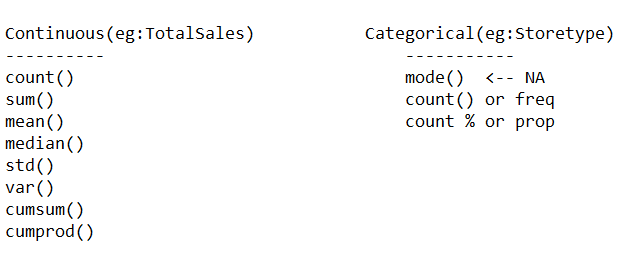


In [10]:
# Task 5
# group by Location and StoreType, Sum of TotalSales and Sum of OperatingCost

# Step 1
temp = stores.groupby(by = ["Location","StoreType"])

# Step 2
res1 = temp[["TotalSales","OperatingCost"]].sum().add_prefix("SumOf_")
display(res1)

res2 = res1.reset_index()
display(res2)

SumOf_TotalSales  SumOf_OperatingCost
Location StoreType                                          
Chennai  Apparel                  915.4                 44.8
         Electronincs             600.8                 33.2
         Super Market             719.2                 51.5
Delhi    Apparel                  745.0                 53.4
         Electronincs             306.7                 45.4
         Super Market             726.0                 62.9
Kolkata  Apparel                  525.0                 62.0
         Electronincs             521.0                 40.6
         Super Market             566.4                 72.2
Mumbai   Apparel                  700.7                 63.1
         Electronincs             790.0                 28.0
         Super Market             266.9                 85.8

,Location,StoreType,SumOf_TotalSales,SumOf_OperatingCost
0,Chennai,Apparel,915.4,44.8
1,Chennai,Electronincs,600.8,33.2
2,Chennai,Super Market,719.2,51.5
3,Delhi,Apparel,745.0,53.4
4,Delhi,Electronincs,306.7,45.4
5,Delhi,Super Market,726.0,62.9
6,Kolkata,Apparel,525.0,62.0
7,Kolkata,Electronincs,521.0,40.6
8,Kolkata,Super Market,566.4,72.2
9,Mumbai,Apparel,700.7,63.1


In [11]:
# Task 6 : 
# group by Location, mean of TotalSales and sum of OperatingCost

# Method 1 (always prefer this method)

# Step 1
temp = stores.groupby(by = "Location")

# Step 2

a = temp[["TotalSales"]].mean().add_prefix("MeanOf_")
b = temp[["OperatingCost"]].sum().add_prefix("SumOf_")

# Step 3

res1 = pd.concat([a,b],axis=1)
display(res1)

res2 = res1.reset_index()
display(res2)

,MeanOf_TotalSales,SumOf_OperatingCost
Location,,
Chennai,279.4250,129.5
Delhi,222.2125,161.7
Kolkata,201.5500,174.8
Mumbai,219.7000,176.9


,Location,MeanOf_TotalSales,SumOf_OperatingCost
0,Chennai,279.4250,129.5
1,Delhi,222.2125,161.7
2,Kolkata,201.5500,174.8
3,Mumbai,219.7000,176.9


In [13]:
# Method 2
#       df.agg()
#       temp[["",""]].agg()

# Step 1
temp = stores.groupby(by = "Location")

# Step 2

# "Totalsales"         "mean"
# "OperatingCost"      "sum"

# {"Totalsales":"mean","OperatingCost":"sum"}  --> dictionary


res1 = temp[["TotalSales","OperatingCost"]].agg({"TotalSales":"mean","OperatingCost":"sum"})

# Step 3
# .agg cant handle prefixes so you have to rename it seperately.
res1 = res1.rename(columns={"TotalSales":"MeanOf_TotalSales","OperatingCost":"SumOf_OperatingCost"})
display(res1)

res2 = res1.reset_index()
display(res2)

,MeanOf_TotalSales,SumOf_OperatingCost
Location,,
Chennai,279.4250,129.5
Delhi,222.2125,161.7
Kolkata,201.5500,174.8
Mumbai,219.7000,176.9


,Location,MeanOf_TotalSales,SumOf_OperatingCost
0,Chennai,279.4250,129.5
1,Delhi,222.2125,161.7
2,Kolkata,201.5500,174.8
3,Mumbai,219.7000,176.9


In [16]:
temp[["TotalSales","OperatingCost"]].agg(["mean","sum"]) # using lists, calculates mean and sum of both

TotalSales         OperatingCost       
               mean     sum          mean    sum
Location                                        
Chennai    279.4250  2235.4       16.1875  129.5
Delhi      222.2125  1777.7       20.2125  161.7
Kolkata    201.5500  1612.4       21.8500  174.8
Mumbai     219.7000  1757.6       22.1125  176.9

In [15]:
temp[["TotalSales","OperatingCost"]].agg({"TotalSales":["mean","sum"],"OperatingCost":"sum"})
#renaming becomes difficut

TotalSales         OperatingCost
               mean     sum           sum
Location                                 
Chennai    279.4250  2235.4         129.5
Delhi      222.2125  1777.7         161.7
Kolkata    201.5500  1612.4         174.8
Mumbai     219.7000  1757.6         176.9

## 8 Reshaping

- convert long format data to wide format data

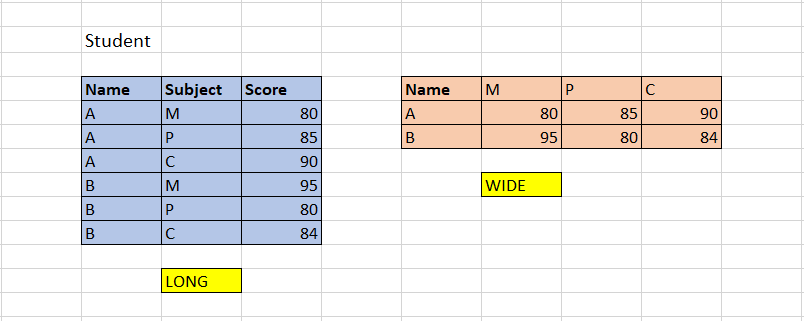

- long format 
    - more no of categorical variables
    - more no of rows than cols
- wide
    - more no of continuous vars
    - more cols than rows

### 8.1 Long to Wide

- take 1 or more categorical vars, transpose them
- the categories of these vars are the new columns
- `df.pivot_table()`
    - index : the columns in long which also remain as columns in wide
    - columns : the categorical vars whose categories are being transposed
    - values : continuous variables

In [75]:
# Step 1
temp = stores.groupby(by = ["Location","StoreType"])

# Step 2
res1 = temp[["TotalSales"]].sum().add_prefix("SumOf_")
res2 = res1.reset_index()
display(res2)

,Location,StoreType,SumOf_TotalSales
0,Chennai,Apparel,915.4
1,Chennai,Electronincs,600.8
2,Chennai,Super Market,719.2
3,Delhi,Apparel,745.0
4,Delhi,Electronincs,306.7
5,Delhi,Super Market,726.0
6,Kolkata,Apparel,525.0
7,Kolkata,Electronincs,521.0
8,Kolkata,Super Market,566.4
9,Mumbai,Apparel,700.7


In [79]:
# long to wide ---> df.pivot_table()
#     index
#           the columns in long which also remain as columns in wide
#     columns
#           the categorical vars whose categories are being transposed
#     values
#           continuous variables
res2_wide = res2.pivot_table(index=["Location"], # <------ for multiple categorical vars, we can pass lists
                 columns=["StoreType"],
                 values="SumOf_TotalSales")   # <------ if there is more than one continous vars, we should treat in wide format
res2_wide

StoreType,Apparel,Electronincs,Super Market
Location,,,
Chennai,915.4,600.8,719.2
Delhi,745.0,306.7,726.0
Kolkata,525.0,521.0,566.4
Mumbai,700.7,790.0,266.9



### 8.2 wide to long
- melt or combine multiple columns to one single column
- the new col will be a cat var
- `df.melt()`
    - `id_vars=[]` : those columns of wide that remain as columns in long format as well
        - the remaining variables get fused into one single column called "variable"
        - the values also get populated accordingly to one single column called "values"
    - `var_name=""` : used to rename the "variable" column
    - `value_name=""` : used to rename the "value" column    

In [80]:
# Step 1
temp = stores.groupby(by = "Location")

# Step 2

a = temp[["TotalSales"]].mean().add_prefix("MeanOf_")
b = temp[["OperatingCost"]].sum().add_prefix("SumOf_")

# Step 3

res1 = pd.concat([a,b],axis=1)


res2 = res1.reset_index()
display(res2)

,Location,MeanOf_TotalSales,SumOf_OperatingCost
0,Chennai,279.4250,129.5
1,Delhi,222.2125,161.7
2,Kolkata,201.5500,174.8
3,Mumbai,219.7000,176.9


In [81]:
res2.melt(id_vars=["Location"])

,Location,variable,value
0,Chennai,MeanOf_TotalSales,279.4250
1,Delhi,MeanOf_TotalSales,222.2125
2,Kolkata,MeanOf_TotalSales,201.5500
3,Mumbai,MeanOf_TotalSales,219.7000
4,Chennai,SumOf_OperatingCost,129.5000
5,Delhi,SumOf_OperatingCost,161.7000
6,Kolkata,SumOf_OperatingCost,174.8000
7,Mumbai,SumOf_OperatingCost,176.9000


In [83]:
res2.melt(id_vars=["Location"], var_name="Metrics", value_name="Values")

,Location,Metrics,Values
0,Chennai,MeanOf_TotalSales,279.4250
1,Delhi,MeanOf_TotalSales,222.2125
2,Kolkata,MeanOf_TotalSales,201.5500
3,Mumbai,MeanOf_TotalSales,219.7000
4,Chennai,SumOf_OperatingCost,129.5000
5,Delhi,SumOf_OperatingCost,161.7000
6,Kolkata,SumOf_OperatingCost,174.8000
7,Mumbai,SumOf_OperatingCost,176.9000


## 9. Missing values

- NaN or missing
- If we don't have complete cases or if we have missing values, we can't do any applied stats
- Alternative ? - either remove the rows that have missing value or substitute the missing value with a suitable value
- How a missing value can be treated according to the Statistical rules?
    1. substitute with mean - numerical cols
    2. substitite with median - numerical cols
    3. substitute with mode - categorical data
    4. substitute with a suitable default value(for rating data, substitute with default value = 0)
    5. delete the rows (when you have luxury of data)

### Important
- Your data points should not go beyond your central tendency.
- They're supposed to stay close to your central tendency.
- Especially when it comes to numerical data, data which is close to your central point is considered to be good enough data. 
- So using that rule, we will substitute our own missing values with central tendency, so that we are not putting any arbitrary values that these values are staying far from a central line.

In [6]:
# Step 1 : 
# see which columns have missings
nmiss = stores.shape[0] - stores.count()
nmiss

StoreCode          0
StoreName          0
StoreType          0
Location           0
OperatingCost      0
Staff_Cnt          0
TotalSales         0
Total_Customers    0
AcqCostPercust     3
BasketSize         0
ProfitPercust      0
OwnStore           0
OnlinePresence     0
Tenure             0
StoreSegment       0
dtype: int64

In [9]:
# Step 2 : 
miss_cols = nmiss.loc[nmiss != 0]
miss_cols

AcqCostPercust    3
dtype: int64

In [10]:
# Step 2.1 : get the list of col names with missing values
list(miss_cols.index)

['AcqCostPercust']

In [11]:
# Step 3 : impute the missing value accordingly
# to do that we can use 
#        Ser.fillna(value)

acq = stores.AcqCostPercust
acq.fillna(acq.mean())
acq.fillna(acq.median())
acq.fillna(999)

# stores.AcqCostPercust = stores.AcqCostPercust.fillna(stores.AcqCostPercust.mean())

0       3.90
1       3.90
2       3.85
3       3.08
4       3.15
5       2.76
6       3.21
7       3.69
8       3.92
9       3.92
10      3.92
11    999.00
12    999.00
13    999.00
14      2.93
15      3.00
16      3.23
17      4.08
18      4.93
19      4.22
20      3.70
21      2.76
22      3.15
23      3.73
24      3.08
25      4.08
26      4.43
27      3.77
28      4.22
29      3.62
30      3.54
31      4.11
Name: AcqCostPercust, dtype: float64

In [13]:
acq.fillna(acq.mean())

0     3.900000
1     3.900000
2     3.850000
3     3.080000
4     3.150000
5     2.760000
6     3.210000
7     3.690000
8     3.920000
9     3.920000
10    3.920000
11    3.651034
12    3.651034
13    3.651034
14    2.930000
15    3.000000
16    3.230000
17    4.080000
18    4.930000
19    4.220000
20    3.700000
21    2.760000
22    3.150000
23    3.730000
24    3.080000
25    4.080000
26    4.430000
27    3.770000
28    4.220000
29    3.620000
30    3.540000
31    4.110000
Name: AcqCostPercust, dtype: float64

## 10. Capping Outliers

- outliers are extremely small or extremely large values
- outliers they skew the data - hence effecting the predictions/calculations/estimations etc
- Capping : Capping means restricting
    - identify the LC(lower cutoff) and UC(upper cutoff)
    - any point < LC and any point > UC are outliers
    - points < LC, substitute with LC
    - points > UC, substitute with UC
- How do we decide on LC and UC????? (percentiles)
    - IQR rule
    - 99% or 95% rule

In [2]:
import pandas as pd
salary = pd.Series([3,6,4,9,11,21,4,2,7,43,10,5,13,21,452053,0.003])
salary

0          3.000
1          6.000
2          4.000
3          9.000
4         11.000
5         21.000
6          4.000
7          2.000
8          7.000
9         43.000
10        10.000
11         5.000
12        13.000
13        21.000
14    452053.000
15         0.003
dtype: float64

In [3]:
# How to get the percentiles???
# we can use Ser.quantile()

#        number between 0 and 1
#        0 means 0% and 1 means 100%

# e.g. calculate 25% value ---> 
salary.quantile(0.25)

4.0

In [4]:
salary.quantile(1)

452053.0

In [5]:
# e.g. : '0%, 1%, 5%, 25% 50%  75%  95%  99% 100%'
q = salary.quantile([0,0.01,0.05,0.25,0.5,0.75,0.95,0.99,1])
q.index = '0%,1%,5%,25%,50%,75%,95%,99%,100%'.split(",")
q

0%           0.00300
1%           0.30255
5%           1.50075
25%          4.00000
50%          8.00000
75%         15.00000
95%     113045.50000
99%     384251.50000
100%    452053.00000
dtype: float64

In [6]:
# IQR Rule

Q1 = salary.quantile(0.25)
Q3 = salary.quantile(0.75)

IQR = Q3 - Q1

LC = Q1 - 1.5 * IQR
UC = Q3 + 1.5 * IQR
print(LC,UC)

# capping : 
# ser.clip(lower = LC, upper = UC)
#           salary.loc[salary < LC] = LC
#           salary.loc[salary > UC] = UC   substitutes 43 and 452053 with 31.5
salary.clip(lower=LC,upper=UC)


-12.5 31.5


0      3.000
1      6.000
2      4.000
3      9.000
4     11.000
5     21.000
6      4.000
7      2.000
8      7.000
9     31.500
10    10.000
11     5.000
12    13.000
13    21.000
14    31.500
15     0.003
dtype: float64

In [115]:
# 99 vs 95 rule

p95 = salary.quantile(0.95)
p99 = salary.quantile(0.99)
p100 =  salary.quantile(1)

d1 = p99 - p95
d2 = p100 - p99

if d1 > d2 or d1==d2:
    UC = p95
    LC = salary.quantile(0.05)
elif d2 > d1:
    UC = p99
    LC = salary.quantile(0.01)

print(LC,UC)

salary.clip(lower = LC, upper = UC)

1.50075 113045.5


0          3.00000
1          6.00000
2          4.00000
3          9.00000
4         11.00000
5         21.00000
6          4.00000
7          2.00000
8          7.00000
9         43.00000
10        10.00000
11         5.00000
12        13.00000
13        21.00000
14    113045.50000
15         1.50075
dtype: float64

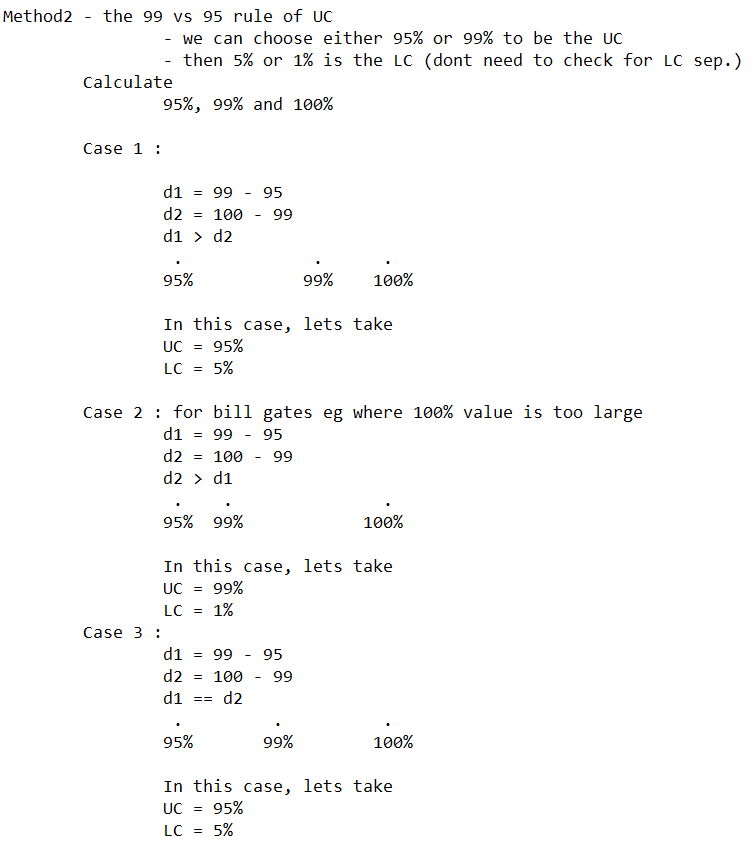

Output is different for both the rules so
- For all the symmetric curves - IQR
- For all the asymmetric curve - p99 vs p95

How to see if a curve is symemtric or not?
  - histogram + distribution plot
  - calculate skewness - for symmetric curves, skew will be close to 0